In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
n = 1000
ni = 5
b0 = 5
b1 = 2

In [36]:
ns = np.linspace(100, 100000, 1000)
nis = np.linspace(0.01,100,1000)

In [3]:
def prosta_regresji(x,y):
    b_1 = np.sum(x*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
    b_0 = np.mean(y) - b_1 * np.mean(x)
    return b_0, b_1

In [45]:
xs = [np.linspace(0,10,int(n_)) for n_ in ns]

In [4]:
x = np.linspace(0,10,1000)

In [5]:
bledy = stats.t.rvs(ni, loc=0, scale=1, size=n)

In [46]:
bledy_rozne_ni = [stats.t.rvs(ni_, loc=0, scale=1, size=n) for ni_ in nis]
bledy_rozne_n = [stats.t.rvs(ni, loc=0, scale=1, size=int(n_)) for n_ in ns]

In [47]:
ys_rozne_ni = [b0 + b1 * xs + blad for blad in bledy_rozne_ni]
ys_rozne_n = [b0 + b1 * xs + blad for blad in bledy_rozne_n]

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [6]:
y = b0 + b1 * x + bledy
b0_e, b1_e = prosta_regresji(x, y)

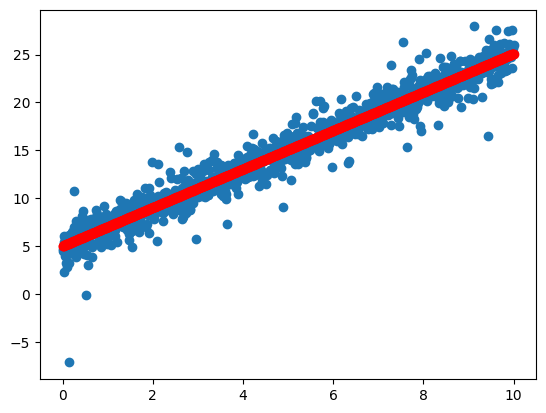

In [7]:
plt.scatter(x,y)
plt.scatter(x, b1_e * x + b0_e, color="r")
plt.show()

In [16]:
def b1_estim(x,y):
    return np.sum((x - np.mean(x)) * (y))/np.sum((x-np.mean(x))**2)

In [17]:
def b0_estim(x,y):
    return np.mean(y) - b1_estim(x,y) * np.mean(x)

In [11]:
print(b1_estim(x,y), b0_estim(x,y))

2.0107729657213054 4.9951913639820695


In [20]:
def mean_estim(x):
    return 1/len(x) * np.sum(x)

In [21]:
def variance_estim(x):
    return 1/(len(x) + 1) * np.sum(x**2)

In [12]:
mc = 1000
def estymacja_mc(mc, n, ni, b0, b1):
    bledy = [stats.t.rvs(ni, loc=0, scale=1, size=n) for i in range(mc)]
    ys = [b0 + b1 * x + blad for blad in bledy]
    b0_e, b1_e = [b0_estim(x,y_) for y_ in ys], [b1_estim(x,y_) for y_ in ys]
    return b0_e, b1_e

In [13]:
b0_e, b1_e = estymacja_mc(mc, n, ni, b0, b1)

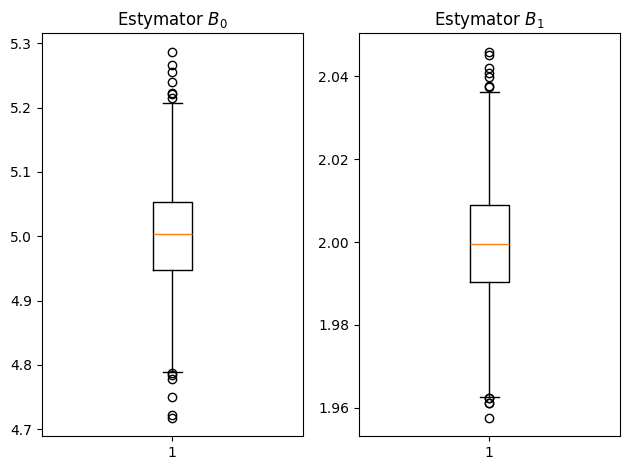

In [18]:
fig, axis = plt.subplots(1,2)

axis[0].boxplot(b0_e)
axis[0].set_title("Estymator $B_0$")

axis[1].boxplot(b1_e)
axis[1].set_title("Estymator $B_1$")
plt.tight_layout()
plt.show()

Zadanie 2

In [5]:
def beta_1(x,y):
    return np.sum(x*y)/np.sum(x**2)

In [6]:
sigmas = [1,2,5]
ns = [1000, 10000, 100000]
epsis = [np.random.normal(0,sigmas[i], ns[i]) for i in range(len(ns))]

In [9]:
beta = 1

In [7]:
xs = [np.random.normal(0,1,n) for n in ns]

In [10]:
ys = [beta * xs[i] + epsis[i] for i in range(len(ns))]

In [11]:
beta_estims = [beta_1(xs[i], ys[i]) for i in range(len(ns))]

In [12]:
means = [np.mean(beta_e) for beta_e in beta_estims]

In [13]:
variances = [np.var(beta_e) for beta_e in beta_estims]

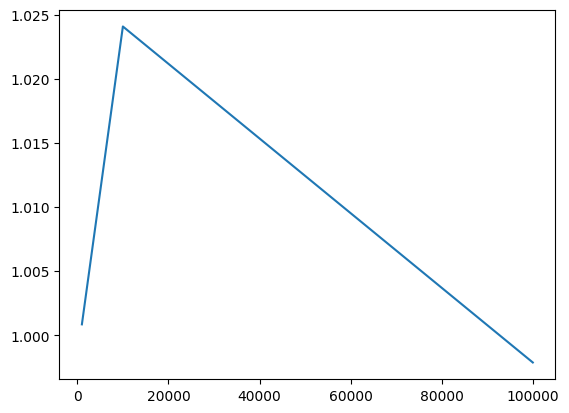

In [14]:
plt.plot(ns, means)
plt.show()

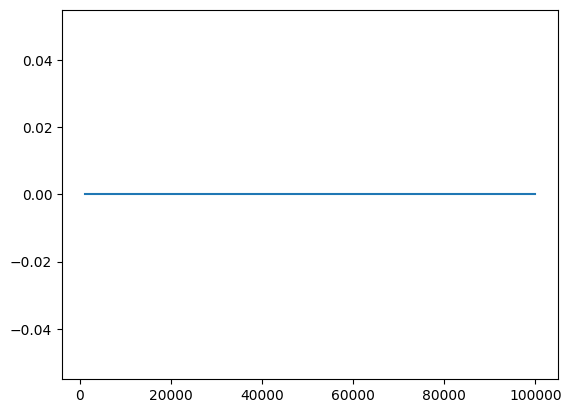

In [15]:
plt.plot(ns, variances)
plt.show()

Zadanie 3

In [26]:
sigma3 = 1

In [34]:
b1_3, b0_3 = 2, 1

In [28]:
n3 = 1000

In [18]:
mc3 = 1000
def mc_simul(mc, n, sigma, b0, b1):
    b1_estims = []
    b0_estims = []
    for i in range(mc):
        x = np.random.normal(0,1,n)
        epsis = np.random.normal(0,sigma,n)
        y = b1* x + b0 + epsis
        b1_estims.append(b1_estim(x,y))
        b0_estims.append(b0_estim(x,y))
    return b1_estims,b0_estims

In [35]:
b1_estims, b0_estims = mc_simul(mc3, n3, sigma3, b0_3, b1_3)

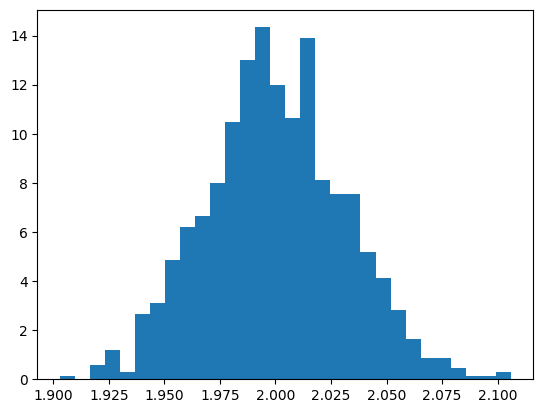

In [20]:
plt.hist(b1_estims, density=True, bins=30)
plt.show()

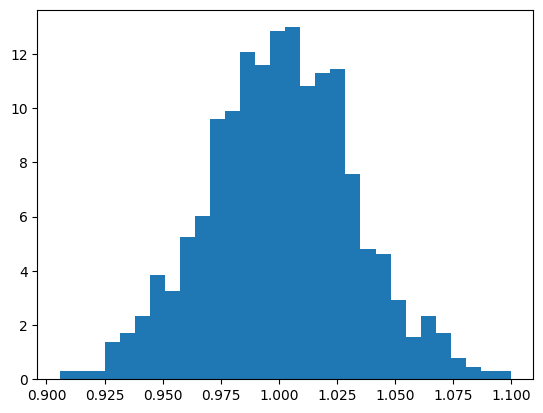

In [22]:
plt.hist(b0_estims, density=True, bins=30)
plt.show()

In [30]:
xs3 = np.random.normal(0,1,n3)

In [27]:
b1_teo_var = sigma3**2/np.sum((xs3 - np.mean(xs3))**2)

In [33]:
b0_teo_var = sigma3**2 * (1/n3 + np.mean(xs3)**2/np.sum((xs3 - np.mean(xs3))**2))

In [36]:
b1_teo_mean = b1_3
b0_teo_mean = b0_3

In [46]:
x_dens1 = np.linspace(1.9,2.1,1000)
x_dens0 = np.linspace(0.9, 1.1, 1000)

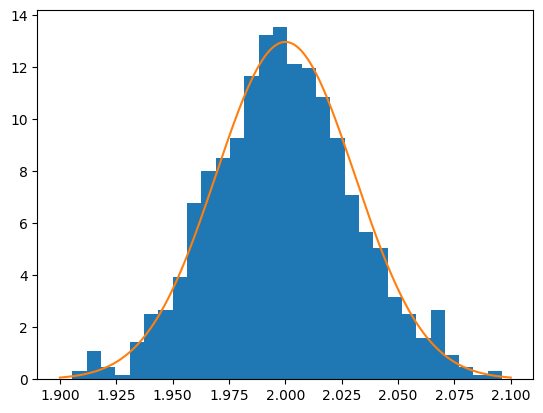

In [47]:
plt.hist(b1_estims, density=True, bins=30)
plt.plot(x_dens1, stats.norm.pdf(x_dens1,b1_teo_mean, np.sqrt(b1_teo_var)))
plt.show()

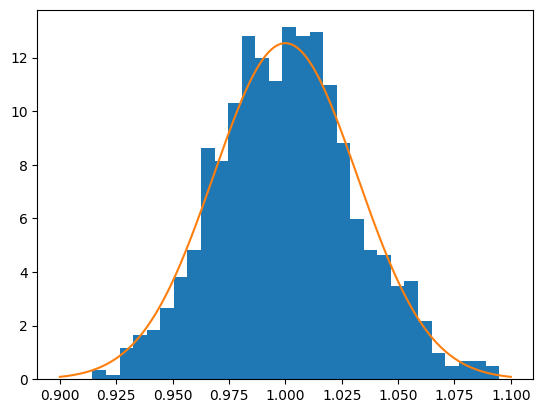

In [48]:
plt.hist(b0_estims, density=True, bins=30)
plt.plot(x_dens0, stats.norm.pdf(x_dens0,b0_teo_mean, np.sqrt(b0_teo_var)))
plt.show()

Zadanie 4

In [50]:
mc4 = 1000
def mc_simul2(mc, n, sigma, b0, b1):
    b1_estims = []
    b0_estims = []
    for i in range(mc):
        x = np.random.normal(0,1,n)
        epsis = np.random.normal(0,sigma,n)
        y = b1* x + b0 + epsis
        SE_beta_1 = sigma / np.sqrt(np.sum((x - np.mean(x))**2))
        SE_beta_0 = np.sqrt(sigma**2 * (1/n + np.mean(x)**2 / np.sum((x - np.mean(x))**2)))
        b1_estims.append((b1_estim(x,y) - b1)/SE_beta_1)
        b0_estims.append((b0_estim(x,y) - b0)/SE_beta_0)
    return b1_estims,b0_estims

In [51]:
b1_estims, b0_estims = mc_simul2(mc4, n3, sigma3, b0_3, b1_3)

In [56]:
x_dens3 = np.linspace(-3,3,1000)

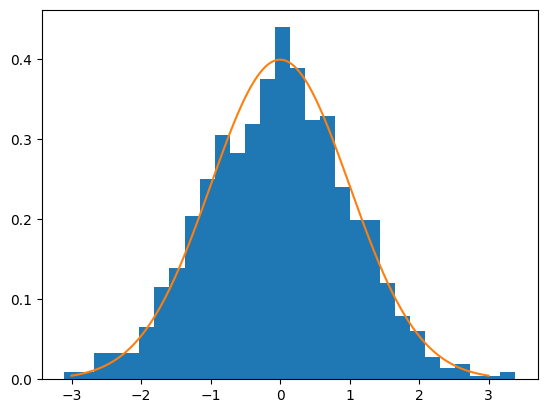

In [57]:
plt.hist(b1_estims, density=True, bins=30)
plt.plot(x_dens3, stats.t.pdf(x_dens3, n3-2))
plt.show()

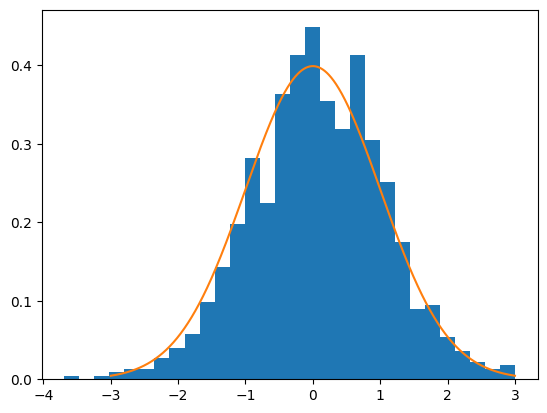

In [58]:
plt.hist(b0_estims, density=True, bins=30)
plt.plot(x_dens3, stats.t.pdf(x_dens3, n3-2))
plt.show()

Zadanie 5

In [3]:
x1 = np.random.normal(0,1,500)
x2 = np.random.normal(3,5,500)

In [5]:
x = np.concatenate((x1,x2))